<a href="https://colab.research.google.com/github/innovateDotAI/outlier_system/blob/main/Feature_enrichment_analysis_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For details on SVM algorithm please reffer to [Support Vector Machines for Machine Learning](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

Additoonal refrencees used:
[One-Class Classification Algorithms for Imbalanced Datasets](https://machinelearningmastery.com/one-class-classification-algorithms/)

# 1. Load the Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)
# Set of libraries
# Test save for new version

# 2. Load the data and One Hot Encoding

In [ ]:
def rawDataload_TWF():
# Load data from UCI and retrun TS as pandas and list of indexes where failure happends in mfList
  #Data loading and keeping one type of failure
  #First download and import the dataset using pandas:
  import pandas as pd
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
  #column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  #'Acceleration', 'Model Year', 'Origin']
  col_name = ['UID','PID','Type','airTemp','processTemp','rotationalSpeed','torque','toolwear','machineFailure','TWF','HDF','PWF','OSF','RNF']
  raw_dataset = pd.read_csv(url, names=col_name,
                            na_values='?', comment='\t',
                            sep=',', skipinitialspace=True,header=0)
  #Drop those rows which will not be part of feature vector:
  rawData = raw_dataset.copy()
  #rawData.drop(['UID','PID','TWF','HDF','PWF','OSF','RNF'], axis = 1, inplace = True)
  rawData.drop(['UID','PID','machineFailure','HDF','OSF','PWF','RNF'], axis = 1, inplace = True)
  rawData.rename(columns={'TWF': 'machineFailure'},inplace=True, errors='raise')
  # mark inliers 1, outliers -1
  #rawSVMdata = rawData.copy()
  # rawData['machineFailure' == '1'] = -1
  # rawData['machineFailure' == '0'] = 1
  # rawData
  rawData.loc[rawData["machineFailure"] == 1, "machineFailure"] = -1
  rawData.loc[rawData["machineFailure"] == 0, "machineFailure"] = 1
  # One Hot Encoding of category datatype
  #raw_dataset
  # # generate binary values using get_dummies
  raw_dataset_oneHot = pd.get_dummies(rawData, columns=["Type"], prefix=["Type_is"] )
  rawTS = raw_dataset_oneHot.copy()
  mfList = rawTS.index[rawTS['machineFailure'] == -1].tolist()
  return rawTS,mfList

In [ ]:
def rawDataload_HDF():
# Load data from UCI and retrun TS as pandas and list of indexes where failure happends in mfList
  #Data loading and keeping one type of failure
  #First download and import the dataset using pandas:
  import pandas as pd
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
  #column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  #'Acceleration', 'Model Year', 'Origin']
  col_name = ['UID','PID','Type','airTemp','processTemp','rotationalSpeed','torque','toolwear','machineFailure','TWF','HDF','PWF','OSF','RNF']
  raw_dataset = pd.read_csv(url, names=col_name,
                            na_values='?', comment='\t',
                            sep=',', skipinitialspace=True,header=0)
  #Drop those rows which will not be part of feature vector:
  rawData = raw_dataset.copy()
  #rawData.drop(['UID','PID','TWF','HDF','PWF','OSF','RNF'], axis = 1, inplace = True)
  rawData.drop(['UID','PID','machineFailure','TWF','OSF','PWF','RNF','rotationalSpeed','torque','toolwear','Type'], axis = 1, inplace = True)
  rawData.rename(columns={'HDF': 'machineFailure'},inplace=True, errors='raise')
  # mark inliers 1, outliers -1
  #rawSVMdata = rawData.copy()
  # rawData['machineFailure' == '1'] = -1
  # rawData['machineFailure' == '0'] = 1
  # rawData
  rawData.loc[rawData["machineFailure"] == 1, "machineFailure"] = -1
  rawData.loc[rawData["machineFailure"] == 0, "machineFailure"] = 1
  # One Hot Encoding of category datatype
  #raw_dataset
  # # # generate binary values using get_dummies
  # raw_dataset_oneHot = pd.get_dummies(rawData, columns=["Type"], prefix=["Type_is"] )
  rawTS = rawData.copy()
  mfList = rawTS.index[rawTS['machineFailure'] == -1].tolist()
  return rawTS,mfList

No missing value found

# Check Maximum possble windows size

In [ ]:
def maxPossibleWin(mfList):
  key =1
  for w in range(2,100,2):
    b1 = w
    len(mfList)
    for i in range(len(mfList)):
      i=i+1
      try:
        diff = mfList[i] - mfList[i-1]
        if diff < b1:
          key = -1
          #print("Index values: ", mfList[i] , mfList[i-1])
          #print(False)
          break
      except:
        pass
    if key == -1:
      #print("max possible window size:",w-2)
      return w-2

# Train and Test data creation Function Module

In [ ]:
def TrainTestData(b1,rawTS,mfList):
  raw_np = rawTS.values
  #print("Input shape of rawTS:",raw_np.shape)
  #print("Input mfList values:",mfList)
  X_test = np.empty((0,raw_np.shape[1]), np.float32)
  # Training dataset creation based on windows size
  # initialize outlier data:
  for i in mfList:
    X_test = np.append(X_test, raw_np[i-b1+1:i+1], axis=0)
  #print(X_test.shape)
  X_train = np.copy(raw_np)
  indexList = []
  for i in mfList:
    #print("Index value i:",i)
    tmp = [i for i in range(i-b1+1,i+1)]
    X= [indexList.append(j) for j in tmp]
  
  #print("Index List:",indexList)
  X_train = np.delete(X_train, indexList, axis=0)
  #print("Shape of X_train after deletion:",X_train.shape)
  #Split features from labels
  #The pop() method removes the specified column from the DataFrame. The pop() method returns the removed columns as a Pandas Series object.
  Y_train = np.copy(X_train)
  Y_test = np.copy(X_test)
  XPopIndex = [5] # Lable value which needs to remove from matrix to generate feature 
  YPopIndex = [0,1,2,3,4,6,7,8] # All featrues index value which needs to be removed.
  X_train = np.delete(X_train, XPopIndex, axis=1)
  X_test = np.delete(X_test, XPopIndex, axis=1)
  Y_train = np.delete(Y_train, YPopIndex, axis=1) # Removing label from Traning_set data
  Y_test = np.delete(Y_test, YPopIndex, axis=1)
  return X_train ,Y_train, X_test,Y_test

In [ ]:
def TrainTestData_HDF(b1,rawTS,mfList):
  raw_np = rawTS.values
  #print("Input shape of rawTS:",raw_np.shape)
  #print("Input mfList values:",mfList)
  X_test = np.empty((0,raw_np.shape[1]), np.float32)
  # Training dataset creation based on windows size
  # initialize outlier data:
  for i in mfList:
    X_test = np.append(X_test, raw_np[i-b1+1:i+1], axis=0)
  #print(X_test.shape)
  X_train = np.copy(raw_np)
  indexList = []
  for i in mfList:
    #print("Index value i:",i)
    tmp = [i for i in range(i-b1+1,i+1)]
    X= [indexList.append(j) for j in tmp]
  
  #print("Index List:",indexList)
  X_train = np.delete(X_train, indexList, axis=0)
  #print("Shape of X_train after deletion:",X_train.shape)
  #Split features from labels
  #The pop() method removes the specified column from the DataFrame. The pop() method returns the removed columns as a Pandas Series object.
  Y_train = np.copy(X_train)
  Y_test = np.copy(X_test)
  XPopIndex = [0] # Lable value which needs to remove from matrix to generate feature 
  YPopIndex = [1] # All featrues index value which needs to be removed.
  X_train = np.delete(X_train, XPopIndex, axis=1)
  X_test = np.delete(X_test, XPopIndex, axis=1)
  Y_train = np.delete(Y_train, YPopIndex, axis=1) # Removing label from Traning_set data
  Y_test = np.delete(Y_test, YPopIndex, axis=1)
  return X_train ,Y_train, X_test,Y_test

# Feature Enrichment Function Module

In [ ]:
### Function module development for feature entrichment
import numpy as np
def TS_window(b,n,TS_C):
  # Function Module to convet TS into Sliding wondows based TS
  # b = window size
  #n = number of features in given TS data
  # TS_C = Normalized TS data

  i = 0
  TS_G = np.empty((0,b,n), np.float32)  
  for w in range(0,len(TS_C),int(b/2)):
    #count+=1
    #print("windows")  
    win = np.empty((0,n), np.float32)
    for i in range(b):
      try:
      #print("feature vector",w+i,"Values are:",X_train_scaled[w+i])
        win = np.append(win, np.array([TS_C[w+i]]), axis=0)
      except:
        continue
    if win.shape[0] == b:
      TS_G = np.append(TS_G, np.array([win]), axis=0)
  return TS_G
def nor_don(TS_G):
  #Stage 2: Convert TS_G into GNOR
  GNOR = np.empty((0,n), np.float32)
  for ti in TS_G:
    #print(ti.shape)
    nor = np.sqrt(np.sum(np.square(ti), axis=0))
    GNOR = np.append(GNOR, np.array([nor]), axis=0)
  #print("GNOR Shape:",GNOR.shape)
  ## Stage2: Convert TS_G into GDON
  GDON = np.empty((0,n), np.float32)
  for di in range(len(GNOR)):
    if int(GDON.shape[0]) != 0:
      don = GNOR[di]-GNOR[di-1]
      GDON = np.append(GDON, np.array([don]), axis=0)
    else:
      #GDON = np.array([[0,0,0,0,0,0,0,0]])
      GDON = np.array([np.zeros(n)])
  return GNOR , GDON
# Function Module to convert NOR and DON metrices to e-statistics of 8 rows
def estates(n,TS_2):
  b =8 # no. of rows for each e-states
  ts_estate = np.empty((0,b,n), np.float32)
  for h in TS_2:
    win_h = np.empty((0,n), np.float32)
    #mean = np.mean(h,axis = 0)
    win_h = np.append(win_h, np.array([np.mean(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.amin(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.amax(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.25,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.50,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.quantile(h,0.75,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.ptp(h,axis = 0)]), axis=0)
    win_h = np.append(win_h, np.array([np.std(h,axis = 0)]), axis=0)
    ts_estate = np.append(ts_estate, np.array([win_h]), axis=0)
  return ts_estate
def merge_don_nor(b,HNOR,HDON):
  # Mearger of NOR and DON e-statistics to one matrix
  #b =16 # no. of rows for mearged e-states (NOR+DON estates)
  n = HNOR.shape[2] # Number of features
  TS_H = np.empty((0,b,n), np.float32)
  for m in range(len(HNOR)):
    h_tmp = np.empty((0,n), np.float32)
    for hi in HNOR[m]:
      h_tmp = np.append(h_tmp, np.array([hi]), axis=0)
    for hd in HDON[m]:
      h_tmp = np.append(h_tmp, np.array([hd]), axis=0)
    #h_tmp = np.append(h_tmp, np.array([HDON[m]]), axis=0)
    TS_H = np.append(TS_H, np.array([h_tmp]), axis=0)
  return TS_H

def main_fm(b1,b2,b3,n,TS_C):
  # b1 is 1st stage window size
  #b2 is 3rd stage window size
  #b3 is no. of estate rows for NOR and DON
  #n = number of features in input TimeSeries
  #TS_C is normalized raw time series 
  # Stage-1
  TS_G = TS_window(b1,n,TS_C)
  #print("stage1 sucness")
  # Stage-2
  GNOR , GDON = nor_don(TS_G)
  #print("stage2 sucness")
  # Sliding window formation for 3rd Stage for GNOR
  b2 = 4 # Windows size
  n = GNOR.shape[1] # Number of features
  HGNOR = TS_window(b2,n,GNOR)
  # Sliding window formation for 3rd Stage for GDON
  n = GDON.shape[1] # Number of features
  HGDON = TS_window(b2,n,GDON)
  # Stage-3: Convert HNOR to e-state matrix
  n = HGNOR.shape[2]
  HNOR = estates(n,HGNOR)
  # Convert HDON to e-state matrix
  n = HGDON.shape[2]
  HDON = estates(n,HGDON)
  #print("stage3 sucness")
  TS_H = merge_don_nor(b3,HNOR,HDON)
  return TS_H


# Model accuracy and Loss ploting function module

In [ ]:
def plt_model_accuracy(history):
  # Plot the graphs
  import matplotlib.pyplot as plt
  # Increase size of plot in jupyter

  plt.rcParams["figure.figsize"] = (16,5.5)  
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  acc = list(history.history.keys())[1]
  val_acc = list(history_2dcnnae.history.keys())[3]
  loss = list(history_2dcnnae.history.keys())[0]
  val_loss = list(history_2dcnnae.history.keys())[2]
  plt.plot(history.history[acc])
  plt.plot(history.history[val_acc])
  plt.title('recreation accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('recreation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Data normalization(Z-score) FM

In [ ]:
def normalizeData(x_in,x_out,b3,n):
  # x_train and x_test is dataset after enrichment
  # Normalize after enrichment X_Inliear input data (  Z-score)
  XTrain = np.empty((0,b3,n), np.float32)
  for i in x_in:
    #print("Value of i:",i)
    mean = np.mean(i,axis = 0)
    std = np.std(i,axis = 0)
    for s in range(len(std)):
      if std[s] <=0:
        std[s] = 0.001
    #print("Value of std:",(std))
    norm = (i-mean)/std
    #print("Value of min,max,norm:",min,max,norm)
    #print('Min',min,'MAx',max,'norm',norm)
    XTrain = np.append(XTrain, np.array([norm]), axis=0)
  #Normalize X_outlier after enrichment( Min Max normalization)
  XTest = np.empty((0,b3,n), np.float32)
  for i in x_out:
    norm1 = (i-mean)/std
    XTest = np.append(XTest, np.array([norm1]), axis=0)
  return XTrain,XTest
  

In [ ]:
def GlobalnormalizeData(x_in,x_out,b3,n):
  # x_train and x_test is dataset after enrichment
  # Normalize after enrichment X_Inliear input data (Z-score)
  x_in_G = x_in.reshape(b3*len(x_in),n)
  mean = np.mean(x_in_G,axis=0)
  std = np.std(x_in_G,axis=0)
  for s in range(len(std)):
    if std[s] <=0:
      std[s] = 0.001
  XTrain = np.empty((0,b3,n), np.float32)
  for i in x_in:
    norm = (i-mean)/std
    XTrain = np.append(XTrain, np.array([norm]), axis=0)
  #Normalize X_outlier after enrichment( Min Max normalization)
  XTest = np.empty((0,b3,n), np.float32)
  for i in x_out:
    norm1 = (i-mean)/std
    XTest = np.append(XTest, np.array([norm1]), axis=0)
  return XTrain,XTest

# 2DCNN_AE Model

## Model Generation FM

In [ ]:
def m4_2dcnnae_single_conv(b3,n,train,e):
  # single layerd CNN AE
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  from tensorflow.keras import regularizers
  input = keras.Input(shape=(b3,n,1),name='Conv_deconv_singleLayer')
  encoder = layers.Conv2D(b3/2,kernel_size=(2,1),kernel_regularizer=regularizers.L1(0.01))(input)
  decoder = layers.Conv2DTranspose(1,kernel_size=(2,1))(encoder)
  model = keras.Model(input,decoder)
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
  history = model.fit(train,train,
                    epochs = e,
                    validation_split = 0.2,
                    shuffle=True

                    )
    
  return model,keras.utils.plot_model(model, "m4_2dcnnae_single_conv.png", show_shapes=True),history

In [ ]:
def m1_cnn_ae_2d(b3,n):
  # Generate AE and retrun the model
  # 2DCNN_AE model construction
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  encoder_input = keras.Input(shape=(b3,n,1), name="img")
  x = layers.Conv2D(16,kernel_size=(3,2),activation='relu')(encoder_input)
  x = layers.Conv2D(32,kernel_size=(3,2),activation='relu')(x)
  encoder_output = layers.MaxPooling2D(pool_size=(2,2))(x)
  # x = layers.Flatten()(x)
  # x = layers.Dense(256,activation='relu')(x)
  # x = layers.Dense(128,activation='relu')(x)
  #encoder_output = layers.Dense(64,activation='relu')(x)
  #encoder_output = layers.Dense(32,activation='softmax')(x)
  #y = layers.Dense(64,activation='relu')(encoder_output)
  # y = layers.Dense(128,activation='relu')(encoder_output)
  # y = layers.Dense(256,activation='relu')(y)
  # y = layers.Dense(576,activation='relu')(y)
  # y = layers.Reshape((6,3,32))(y)
  y = layers.Conv2DTranspose(32, kernel_size = (7,4), activation="relu")(encoder_output)
  y = layers.Conv2DTranspose(16, kernel_size = (3,2), activation="relu")(y)
  y = layers.Conv2DTranspose(1, kernel_size = (3,2), activation="relu")(y)
  decoder_output = layers.Reshape((b3,n))(y)
  cnn_ae_model=keras.Model(encoder_input,decoder_output)
  #cnn_ae_model.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return cnn_ae_model ,keras.utils.plot_model(cnn_ae_model, "m1_cnn_ae_model.png", show_shapes=True)

In [ ]:
def m2_cnn_ae_2d(b3,n):
  # Generate AE and retrun the model
  # 2DCNN_AE model construction
  import tensorflow as tf
  from tensorflow import keras
  from keras import layers
  encoder_input = keras.Input(shape=(b3,n,1), name="machineSnape")
  x = layers.Conv2D(16,kernel_size=(3,2),activation='relu')(encoder_input)
  x = layers.Conv2D(32,kernel_size=(3,2),activation='relu')(x)
  X = layers.MaxPooling2D(pool_size=(2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256,activation='relu')(x)
  x = layers.Dense(128,activation='relu')(x)
  x = layers.Dense(64,activation='relu')(x)
  encoder_output = layers.Dense(32,activation='softmax')(x)
  y = layers.Dense(64,activation='relu')(encoder_output)
  y = layers.Dense(128,activation='relu')(y)
  y = layers.Dense(256,activation='relu')(y)
  y = layers.Dense(2304,activation='relu')(y)
  y = layers.Reshape((12,6,32))(y)
  y = layers.Conv2DTranspose(16, kernel_size = (3,2), activation="relu")(y)
  y = layers.Conv2DTranspose(1, kernel_size = (3,2), activation="relu")(y)
  decoder_output = layers.Reshape((b3,n))(y)
  cnn_ae_model=keras.Model(encoder_input,decoder_output)
  sumarry = cnn_ae_model.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return cnn_ae_model ,keras.utils.plot_model(cnn_ae_model, "m2_cnn_ae_model.png", show_shapes=True),summary

In [ ]:
def  m3_nn_model1(b3,n):
  import keras
  from keras import layers

  # This is the size of our encoded representations
  encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
  in_dim = b3*n

  # This is our input image
  input_img = keras.Input(shape=(in_dim,))
  # "encoded" is the encoded representation of the input
  encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
  # "decoded" is the lossy reconstruction of the input
  decoded = layers.Dense(in_dim, activation='sigmoid')(encoded)

  # This model maps an input to its reconstruction
  nn_AE = keras.Model(input_img, decoded)
  sumarry = nn_AE.summary()
  #keras.utils.plot_model(cnn_ae_model, "cnn_ae_model.png", show_shapes=True)
  return nn_AE ,keras.utils.plot_model(nn_AE, "m2_m3_nn_model1.png", show_shapes=True),summary

## Model Compile and Training FM

In [ ]:
def cnn_modelTrain(train,e):
# TS_HN is input data in numpy formate
# e = no. of epochs
# Validation happens automaticically using 20% of training data as validation data.
#cnn_ae_model.compile(optimizer='adam',loss='binary_crossentropy')
  cnn_ae_model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['cosine_similarity'])
  history_2dcnnae = cnn_ae_model.fit(train,train,
                    epochs = e,
                    shuffle=True,
                    verbose=1,
                    validation_split = 0.2,
                    )
  return history_2dcnnae

In [ ]:
def m3_nn_model1_Train(train,e):
  # TS_HN is input data in numpy formate
  # e = no. of epochs
  # Validation happens automaticically using 20% of training data as validation data.
  #cnn_ae_model.compile(optimizer='adam',loss='binary_crossentropy')
  train = train.reshape(train.shape[0],train.shape[1]*train.shape[2])
  m3_nn_model1.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['cosine_similarity'])
  history_2dcnnae = m3_nn_model1.fit(train,train,
                    epochs = e,
                    shuffle=True,
                    verbose=1,
                    validation_split = 0.2,
                    )
  return history_2dcnnae

# Output analysis

## Image generation of snapshort

In [ ]:
def img_gen(train,img):
  # Image generation for training set:
  plt.figure(figsize=(10, 4))
  for i in range(1, img + 1):
      # Display original
      ax = plt.subplot(2, img, i)
      plt.imshow(train[i])
      #plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

# Prediction from Model for outlier

In [ ]:
def outlierPredict(inliear,outlier,model):
  # predict the oulier
  inlier_lst = []
  y_pred = model.predict(inliear) 
  for i in range(len(inliear)):
    y_true = inliear[i]
    mse = tf.keras.losses.MeanSquaredError()
    #print(mse(y_true, y_pred).numpy())
    inlier_lst.append(mse(y_true, y_pred[i]).numpy())
  #print(inlier_lst)
  oulier_lst = []
  y_pred = model.predict(outlier)
  for i in range(len(outlier)):
    y_true = outlier[i]
    mse = tf.keras.losses.MeanSquaredError()
    #print(mse(y_true, y_pred).numpy())
    oulier_lst.append(mse(y_true, y_pred[i]).numpy())
  #print(oulier_lst)
  Ubound = max(inlier_lst)
  Lbound = min(inlier_lst)
  print("Inlear Upper bound:",Ubound)
  print("Inlear Lower bound:",Lbound)
  print("Outlier Upper bound:",max(oulier_lst))
  print("Outlier Lower bound:",min(oulier_lst))
  det_list = []
  len(oulier_lst)
  for i in range(len(oulier_lst)):
    det_dict = {}
    if (oulier_lst[i] > Lbound) & (oulier_lst[i] < Ubound):
      det_dict['snp_no'] = i
      det_dict['lable'] = 'Inliear'
    else:
      det_dict['snp_no'] = i
      det_dict['lable'] = 'Outlier'
    #print(det_list)
    det_list.append(det_dict)
  #print(det_list)
  co =0
  for i in det_list:
    if i['lable'] == 'Outlier':
      co+=1
  print("No. of correctly identified outlier:",co)
  #return det_list

# LSTM_AE Model ( Under Construction)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Model, layers
from keras.layers import Input,LSTM

In [ ]:
#LSTM Input
#lstm_input = TS_H.reshape(TS_H.shape[0],TS_H.shape[1]*TS_H.shape[2])

In [ ]:
#lstm_input.shape

In [ ]:

# #timestep = lstm_input.shape[0]
# timestep = 1
# input_dim = lstm_input.shape[1]
# latent_dim = 128
# input_lstm = keras.Input((timestep,input_dim))
# x = layers.LSTM(latent_dim,return_sequences=True)(input_lstm)
# x = layers.LSTM(latent_dim)(x)
# x = layers.Dense(64,activation='relu')(x)
# encod_op = layers.Dense(32,activation='sigmoid')(x)
# y1 = layers.Dense(64,activation='relu')(encod_op)
# y1 = layers.Dense(128,activation='relu')(y1)
# y1 = layers.RepeatVector(timestep)(y1)
# y1 = layers.LSTM(input_dim, return_sequences=True)(y1)
# decoded = layers.LSTM(input_dim, return_sequences=True)(y1)

# lstm_encod_model = keras.Model(input_lstm,decoded)
# lstm_encod_model.summary()
# keras.utils.plot_model(lstm_encod_model, "lstm_encod_model.png", show_shapes=True)

In [ ]:
# decoded.shape

In [ ]:
# lstm_encod_model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
# X_train = lstm_input.reshape(2389,1,128)
# history_lstmae = lstm_encod_model.fit(X_train,X_train,
#                 epochs = 10,
#                validation_split = 0.2,
#                 shuffle = True
#                 )

In [ ]:
# # Plot accuracy graph
# plt_model_accuracy(history_lstmae)

In [ ]:
# #input = Input(shape=(None,8))
# input = keras.Input(shape=(None,8,))
# lstm_op = layers.LSTM(1)(input)
# output = layers.Dense(1,activation='sigmoid')(lstm_op)
# model_lstm = Model(input,output)

In [ ]:
# model_lstm.summary()

In [ ]:
# keras.utils.plot_model(model_lstm, "1my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
# model_lstm.compile(optimizer='adam',loss = 'binary_crossentropy')

In [ ]:
# X_test_scaled.shape

In [ ]:
# X_train = X_train_scaled.reshape(7729,1,8)
# Y_train = np.array(train_labels).reshape(7729,1)
# X_test = X_test_scaled.reshape(1932,1,8)
# Y_test = np.array(test_labels).reshape(1932,1)
# model_lstm.fit(X_train,Y_train,
#                 epochs = 50,
#                validation_data = (X_test,Y_test),
#                batch_size = 100,
#                 shuffle = True
#                 )

# Main python body

## Heat dissipation failure machine failure analysis

In [ ]:
b1 = 10 # 1st stage window size of enrichment
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 1
e = 50 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload_HDF()
rawTS['diff'] = rawTS['airTemp'] - rawTS['processTemp']
rawTS['diff'] = rawTS['diff'].abs()
rawTS.drop(['airTemp','processTemp'], axis = 1, inplace = True)
rawTS.head()
# Controled dataset for calculation check:
# slice the data based on failure point
sliceAt = 6 # No. of top failure points needs to include
mfList_c = mfList[:sliceAt]
rawTS_c = rawTS[0:mfList_c[-1]+1]
#Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData_HDF(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
#Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
#x_trainN, x_testN = normalizeData(X_Inliear,X_outlier,b3,n)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
# Since loss function is not converging, so need to trace the issue:We will check the Input and output values for model
# create single record training set
#x_trainN_1 = x_trainN[1].reshape(1,16,1) # training set with single record
#x_trainN_10 = x_trainN[1:10] # training set with single record
# Model generation and training:
cnn1_model_1,k1,h1 = m4_2dcnnae_single_conv(b3,n,X_Inliear,e)
y_pred = cnn1_model_1.predict(X_outlier)
print("y_true.shape",X_outlier.shape)
print("y_predict.shape",y_pred.shape)


# img_gen(x_trainN,10)
# img_gen(x_testN,10)

In [ ]:
TS_G,GNOR,GDON,HGNOR,HGDON,HNOR,HDON,TS_H = main_fm(b1,b2,b3,n,x_train)

In [ ]:
print("Shape of transfomred Data",TS_H.shape)
print("First record of new data \n",TS_H[0])

Shape of transfomred Data (931, 16, 1)
First record of new data 
 [[33.173]
 [33.078]
 [33.268]
 [33.102]
 [33.173]
 [33.244]
 [ 0.19 ]
 [ 0.081]
 [-0.008]
 [-0.19 ]
 [ 0.127]
 [-0.047]
 [ 0.016]
 [ 0.056]
 [ 0.316]
 [ 0.115]]


In [ ]:
print("Shape of transfomred Data",HDON.shape)
print("First record of new data \n",HDON[0])

Shape of transfomred Data (931, 8, 1)
First record of new data 
 [[-0.008]
 [-0.19 ]
 [ 0.127]
 [-0.047]
 [ 0.016]
 [ 0.056]
 [ 0.316]
 [ 0.115]]


In [ ]:
print("Shape of transfomred Data",HNOR.shape)
print("First record of new data \n",HNOR[0])

Shape of transfomred Data (931, 8, 1)
First record of new data 
 [[33.173]
 [33.078]
 [33.268]
 [33.102]
 [33.173]
 [33.244]
 [ 0.19 ]
 [ 0.081]]


In [ ]:
print("Shape of transfomred Data",HGDON.shape)
print("First record of new data \n",HGDON[0])

Shape of transfomred Data (931, 4, 1)
First record of new data 
 [[ 0.   ]
 [ 0.127]
 [ 0.032]
 [-0.19 ]]


In [ ]:
print("Shape of transfomred Data",GDON.shape)
print("Top 10 record of new data \n",GDON[0:10])

Shape of transfomred Data (1864, 1)
Top 10 record of new data 
 [[ 0.   ]
 [ 0.127]
 [ 0.032]
 [-0.19 ]
 [-0.19 ]
 [-0.063]
 [-0.095]
 [-0.095]
 [ 0.   ]
 [-0.126]]


In [ ]:
print("Shape of transfomred Data",GNOR.shape)
print("Top 10 record of new data \n",GNOR[0:10])

Shape of transfomred Data (1864, 1)
Top 10 record of new data 
 [[33.109]
 [33.236]
 [33.268]
 [33.078]
 [32.888]
 [32.825]
 [32.73 ]
 [32.635]
 [32.635]
 [32.509]]


In [ ]:
print("Shape of transfomred Data",TS_G.shape)
print("First record of new data \n",TS_G[0])

Shape of transfomred Data (1864, 10, 1)
First record of new data 
 [[10.5]
 [10.5]
 [10.4]
 [10.4]
 [10.5]
 [10.5]
 [10.5]
 [10.5]
 [10.4]
 [10.5]]


In [ ]:
print("Inlier Input Data Shape",x_train.shape)
print("Top 10 record \n",x_train[0:10])

Inlier Input Data Shape (9329, 1)
Top 10 record 
 [[10.5]
 [10.5]
 [10.4]
 [10.4]
 [10.5]
 [10.5]
 [10.5]
 [10.5]
 [10.4]
 [10.5]]


### Effect of data enrichment 

inlear min values [24.866 24.603 25.431 24.627 24.714 24.953  0.     0.    -0.554 -1.002
 -0.379 -0.947 -0.592 -0.379  0.031  0.014]
inlear max values [37.892 37.79  37.98  37.813 37.9   37.979  2.142  0.818  0.664  0.409
  0.948  0.488  0.65   0.826  1.541  0.651]
Outlier min values [24.287 24.16  24.478 24.161 24.256 24.382  0.031  0.014 -0.467 -0.638
 -0.127 -0.606 -0.552 -0.413  0.031  0.016]
Outlier max values [27.513 27.418 27.671 27.442 27.482 27.553  1.545  0.576  0.364  0.095
  0.595  0.238  0.382  0.508  0.984  0.388]


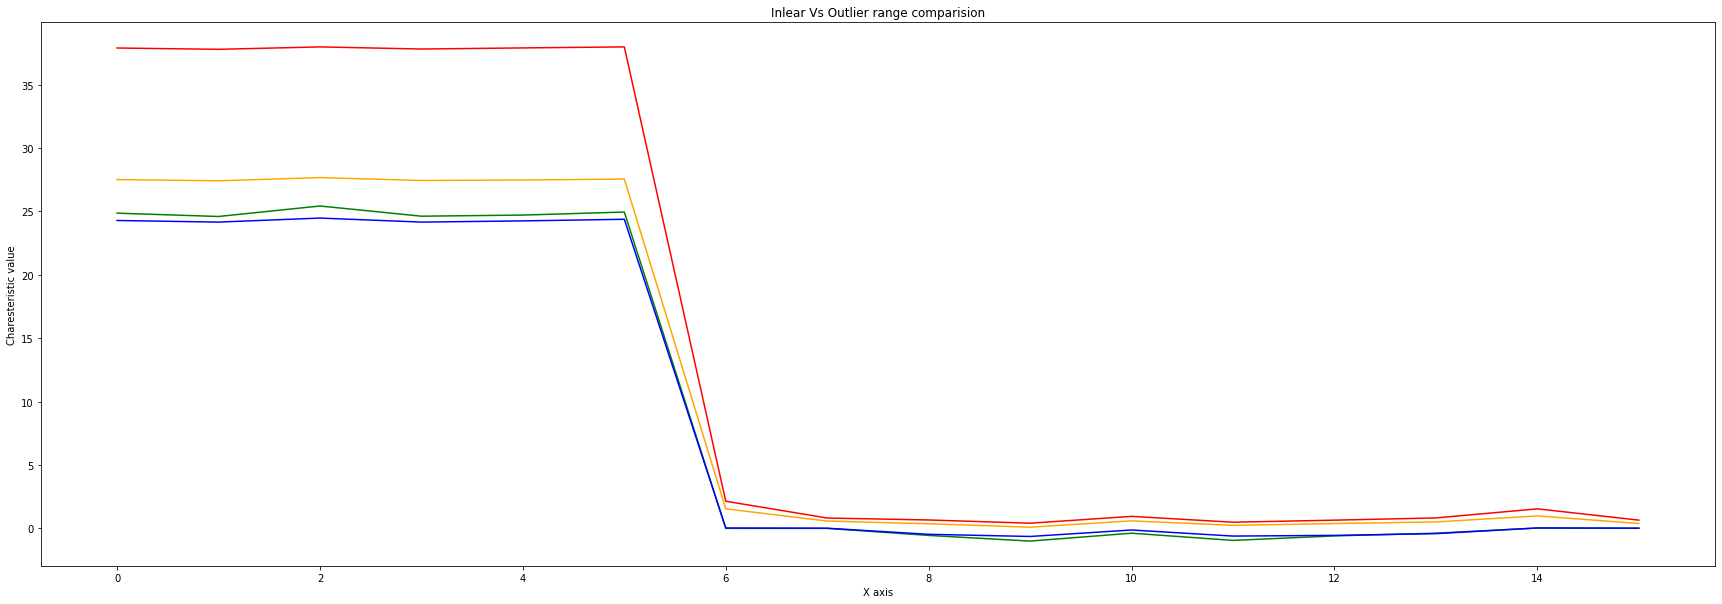

In [ ]:
# Inlear data ranges
import numpy as np
import matplotlib.pyplot as plt
# plotting
plt.figure(figsize=(30,10))
plt.title("Inlear Vs Outlier range comparision")
plt.xlabel("X axis")
plt.ylabel("Charesteristic value")
inler = X_Inliear.reshape(931,16)
Inlear_min = np.amin(inler,axis = 0)
plt.plot(Inlear_min, color ="green")
Inlear_max = np.amax(inler,axis = 0)
plt.plot(Inlear_max, color ="red")
print("inlear min values",Inlear_min)
print("inlear max values",Inlear_max)
#Outlier data ranges
outler = X_outlier.reshape(113,16)
Outler_min = np.amin(outler,axis = 0)
plt.plot(Outler_min, color ="blue")
Outler_max = np.amax(outler,axis = 0)
plt.plot(Outler_max, color ="orange")
print("Outlier min values",Outler_min)
print("Outlier max values",Outler_max)
# importing the library
plt.show()


**We can see that outlier range is falling in between Inliear range, so diffrentiation through machine learning is not possible. This also shows that data enrichment technique used in this dataset is not suitable. So we need to check the variation on raw data for prediction**

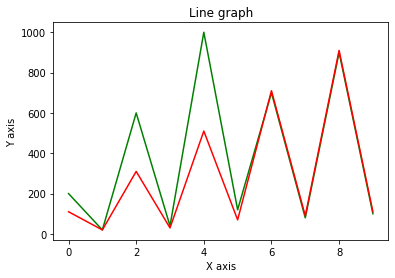

In [ ]:
# importing the library
import numpy as np
import matplotlib.pyplot as plt

# data to be plotted
x = np.arange(1, 11)
y = np.array([200, 20, 600, 40, 1000, 120, 700, 80, 900, 100])
y1 = np.array([110, 20, 310, 30, 510, 70, 710, 90, 910, 110])

# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(y, color ="green")
plt.plot(y1, color ="red")
plt.show()

In [ ]:
X_outlier.shape

(113, 16, 1)

In [ ]:
cnn1_model.get_weights()
for layers in cnn1_model.layers:
  print("Layer Name:",layers)
  print("Layers Values:",layers.get_weights())

Layer Name: <keras.engine.input_layer.InputLayer object at 0x7f4fd363cb10>
Layers Values: []
Layer Name: <keras.layers.convolutional.Conv2D object at 0x7f4f6b0b7390>
Layers Values: [array([[[[ 0.211, -0.506,  0.213, -0.321, -0.142, -0.095,  0.362,
          -0.382]]],


       [[[-0.262, -0.053,  0.378, -0.366, -0.393,  0.317, -0.478,
          -0.079]]]], dtype=float32), array([-0.017, -0.014,  0.   , -0.016, -0.018,  0.019,  0.019,  0.018],
      dtype=float32)]
Layer Name: <keras.layers.pooling.MaxPooling2D object at 0x7f4f6b0a6890>
Layers Values: []
Layer Name: <keras.layers.convolutional.Conv2D object at 0x7f4f6a364490>
Layers Values: [array([[[[-0.184, -0.201, -0.097, -0.095, -0.099, -0.051,  0.156,
          -0.2  ],
         [ 0.153, -0.057,  0.15 ,  0.186, -0.045,  0.007, -0.027,
          -0.043],
         [ 0.151,  0.2  ,  0.123, -0.131,  0.09 , -0.045, -0.178,
          -0.112],
         [ 0.143, -0.007,  0.076, -0.014,  0.101, -0.08 ,  0.181,
          -0.116],
         [-

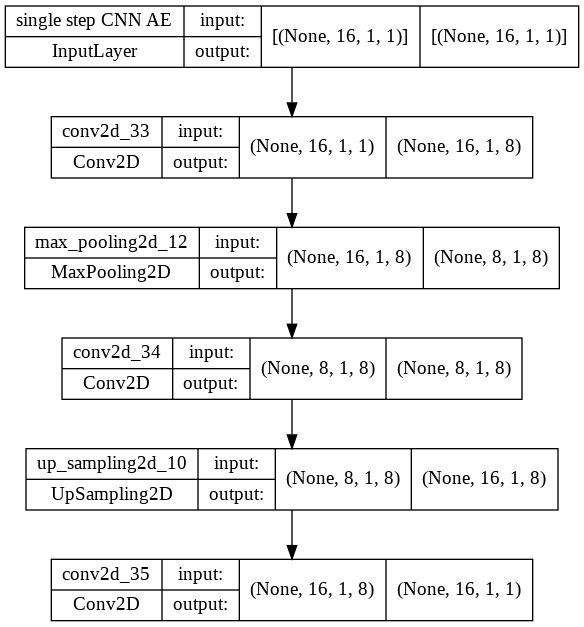

In [ ]:
k1

## Basic Setup of 2DCNN-AE model with unnormalize data

Epoch 1/10
24/24 [==============================] - 1s 27ms/step - loss: 589158.8750 - cosine_similarity: 0.4014 - val_loss: 160674.3438 - val_cosine_similarity: 0.4833
Epoch 2/10
24/24 [==============================] - 0s 18ms/step - loss: 80898.1484 - cosine_similarity: 0.4936 - val_loss: 29817.6211 - val_cosine_similarity: 0.5050
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 19010.9941 - cosine_similarity: 0.4993 - val_loss: 12684.3770 - val_cosine_similarity: 0.5052
Epoch 4/10
24/24 [==============================] - 0s 18ms/step - loss: 12764.7256 - cosine_similarity: 0.5024 - val_loss: 11448.5342 - val_cosine_similarity: 0.5055
Epoch 5/10
24/24 [==============================] - 0s 18ms/step - loss: 12317.4004 - cosine_similarity: 0.5139 - val_loss: 11330.8184 - val_cosine_similarity: 0.5390
Epoch 6/10
24/24 [==============================] - 0s 18ms/step - loss: 12236.5332 - cosine_similarity: 0.5478 - val_loss: 11276.5225 - val_cosine_similarity: 0.5

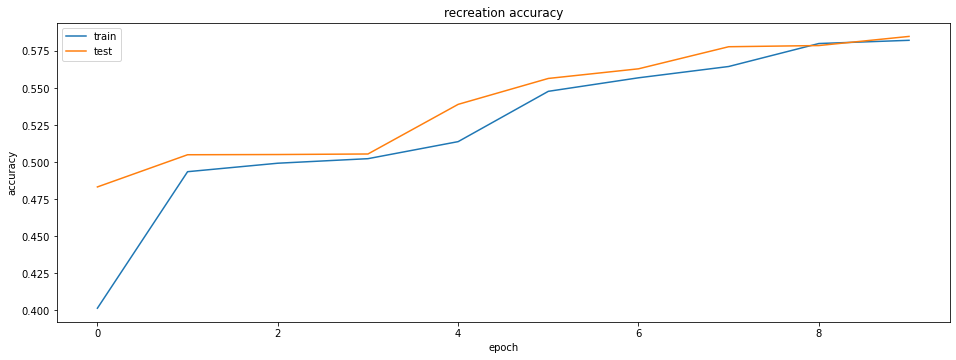

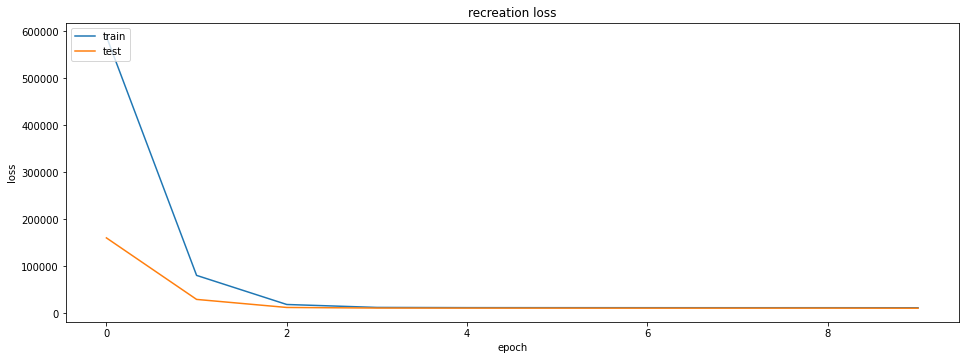

Inlear Upper bound: 47226.9
Inlear Lower bound: 2763.9756
Outlier Upper bound: 32092.973
Outlier Lower bound: 15291.703
No. of correctly identified outlier: 0


In [ ]:
#################################### Main Unnormalized data#####################
b1 = 10 # 1st stage window size of enrichment
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 8
e = 10 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload()
# # Controled dataset for calculation check:
# # slice the data based on failure point
# sliceAt = 6 # No. of top failure points needs to include
# mfList_c = mfList[:sliceAt]
# rawTS_c = rawTS[0:mfList_c[-1]+1]
# Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
# Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
#x_trainN, x_testN = normalizeData(X_Inliear,X_outlier,b3,n)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
# Generate 2DCNN_AE
cnn_ae_model , modelAsDAG = m1_cnn_ae_2d(b3,n)
modelAsDAG
# Compile and Train the Model
history_2dcnnae = cnn_modelTrain(X_Inliear,e)
# Plot accuracy graph
plt_model_accuracy(history_2dcnnae)
# Outlier prediction
outlierPredict(X_Inliear,X_outlier,cnn_ae_model)


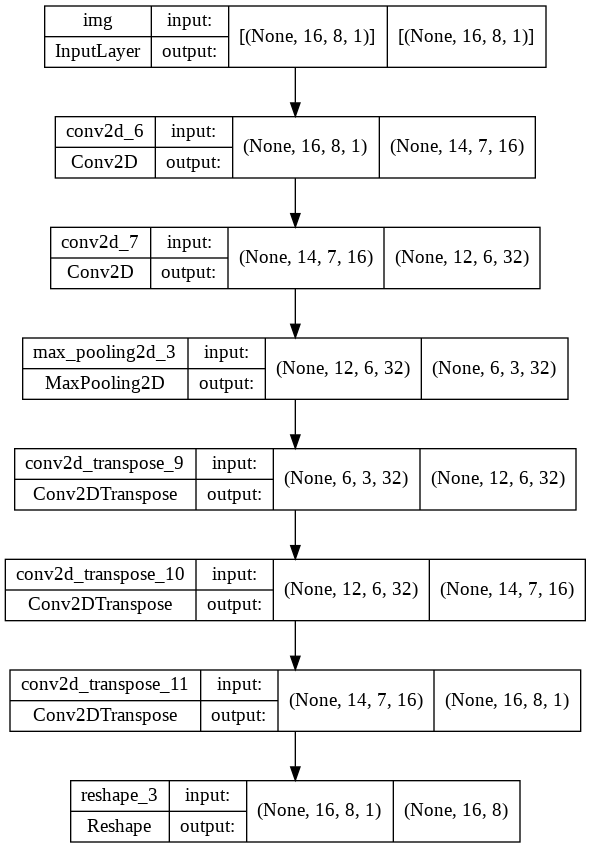

In [ ]:
# Model DAG ( Directed Acyclic Graph)
modelAsDAG

## Basic 2DCNN_AE model with Normalized(Z-score) data

Epoch 1/10
24/24 [==============================] - 1s 28ms/step - loss: 0.7324 - cosine_similarity: 0.2241 - val_loss: 0.5574 - val_cosine_similarity: 0.3387
Epoch 2/10
24/24 [==============================] - 0s 20ms/step - loss: 0.5103 - cosine_similarity: 0.3741 - val_loss: 0.4699 - val_cosine_similarity: 0.3865
Epoch 3/10
24/24 [==============================] - 0s 19ms/step - loss: 0.4577 - cosine_similarity: 0.4099 - val_loss: 0.4408 - val_cosine_similarity: 0.4207
Epoch 4/10
24/24 [==============================] - 0s 20ms/step - loss: 0.4390 - cosine_similarity: 0.4290 - val_loss: 0.4304 - val_cosine_similarity: 0.4366
Epoch 5/10
24/24 [==============================] - 0s 20ms/step - loss: 0.4310 - cosine_similarity: 0.4392 - val_loss: 0.4257 - val_cosine_similarity: 0.4369
Epoch 6/10
24/24 [==============================] - 0s 20ms/step - loss: 0.4266 - cosine_similarity: 0.4430 - val_loss: 0.4234 - val_cosine_similarity: 0.4447
Epoch 7/10
24/24 [============================

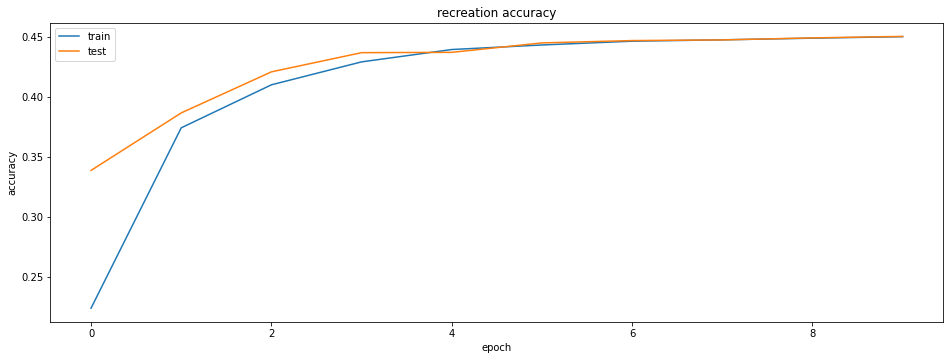

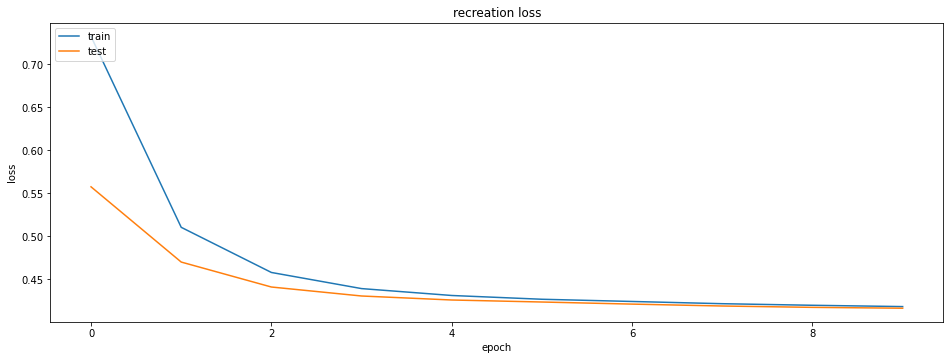

Inlear Upper bound: 0.6125431
Inlear Lower bound: 0.32956582
Outlier Upper bound: 0.59792805
Outlier Lower bound: 0.35274816
No. of correctly identified outlier: 0


In [ ]:
#################################### Main Normalized data#####################
b1 = 10 # 1st stage window size of enrichment
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 8
e = 10 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload()
# # Controled dataset for calculation check:
# # slice the data based on failure point
# sliceAt = 6 # No. of top failure points needs to include
# mfList_c = mfList[:sliceAt]
# rawTS_c = rawTS[0:mfList_c[-1]+1]
# Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
# Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
#x_trainN, x_testN = normalizeData(X_Inliear,X_outlier,b3,n)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)

# Generate 2DCNN_AE
cnn_ae_model , modelAsDAG = m1_cnn_ae_2d(b3,n)
modelAsDAG
# Compile and Train the Model
history_2dcnnae = cnn_modelTrain(x_trainN,e)
# Plot accuracy graph
plt_model_accuracy(history_2dcnnae)
# Outlier prediction
outlierPredict(x_trainN,x_testN,cnn_ae_model)

In [ ]:
cnn_ae_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 16, 8, 1)]        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 7, 16)         112       
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 6, 32)         3104      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 12, 6, 32)        28704     
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 14, 7, 16)        3088

## Optimization of 2DCNN-AE through Hypre Parameter optimization: Variable::window size:b1(1st window), Constant::(2nd window size=4, 2DCNN-AE model)

In [ ]:
#Paraemter optimization through iterration
# Iteration of b1 by keeping model and b2 fixed
for b1 in range(2,40,2):
  #################################### Main Normalized data#####################
  #b1 = 10 # 1st stage window size of enrichment
  print("Window size:",b1)
  b2 = 4  # 2nd Stage window size of enrichment
  b3 =16
  n = 8
  e = 50 # no. of epochs
  # Load Raw TS data
  rawTS, mfList = rawDataload()
  # # Controled dataset for calculation check:
  # # slice the data based on failure point
  # sliceAt = 6 # No. of top failure points needs to include
  # mfList_c = mfList[:sliceAt]
  # rawTS_c = rawTS[0:mfList_c[-1]+1]
  # Convert Raw TS in Inlier and outlier as per window size
  x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
  # Check for max possible window size
  maxWin = maxPossibleWin(mfList)
  # Enrich the TS data
  X_Inliear = main_fm(b1,b2,b3,n,x_train)
  X_outlier = main_fm(b1,b2,b3,n,x_test)
  # Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
  x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
  # Generate 2DCNN_AE
  cnn_ae_model , modelAsDAG = cnn_ae_2d(b3,n)
  modelAsDAG
  # Compile and Train the Model
  history_2dcnnae = modelTrain(x_trainN,e)
  # Plot accuracy graph
  #plt_model_accuracy(history_2dcnnae)
  # Outlier prediction
  outlierPredict(x_trainN,x_testN)

Window size: 2
Inlear Upper bound: 0.61045325
Inlear Lower bound: 0.28823847
Outlier Upper bound: 0.46519217
Outlier Lower bound: 0.3129019
No. of correctly identified outlier: 0
Window size: 4
Inlear Upper bound: 0.6101676
Inlear Lower bound: 0.31058317
Outlier Upper bound: 0.50775224
Outlier Lower bound: 0.32696396
No. of correctly identified outlier: 0
Window size: 6
Inlear Upper bound: 0.57900167
Inlear Lower bound: 0.3180877
Outlier Upper bound: 0.4631728
Outlier Lower bound: 0.3463121
No. of correctly identified outlier: 0
Window size: 8
Inlear Upper bound: 0.67745787
Inlear Lower bound: 0.3283954
Outlier Upper bound: 0.5224
Outlier Lower bound: 0.3310228
No. of correctly identified outlier: 0
Window size: 10
Inlear Upper bound: 0.5779026
Inlear Lower bound: 0.3234046
Outlier Upper bound: 0.52014524
Outlier Lower bound: 0.3371725
No. of correctly identified outlier: 0
Window size: 12
Inlear Upper bound: 0.79257894
Inlear Lower bound: 0.35236138
Outlier Upper bound: 0.6959737
Outl

**Best configuration**

Window size: 30

Inlear Upper bound: 0.53451127
Inlear Lower bound: 0.33023545


Outlier Upper bound: 0.58717173
Outlier Lower bound: 0.4060669
No. of correctly identified outlier: 2

## Optimization of 2DCNN-AE through Hypre Parameter optimization: Variable::window size:b2(2nd window), Constant::(1st window size=30, 2DCNN-AE model)

In [ ]:
#Paraemter optimization through iterration
# Iteration of b1 by keeping model and b2 fixed
for b2 in range(2,40,2):
  #################################### Main Normalized data#####################
  b1 = 30 # 1st stage window size of enrichment
  print("2nd Window size:",b2)
  #b2 = 4  # 2nd Stage window size of enrichment
  b3 =16
  n = 8
  e = 50 # no. of epochs
  # Load Raw TS data
  rawTS, mfList = rawDataload()
  # # Controled dataset for calculation check:
  # # slice the data based on failure point
  # sliceAt = 6 # No. of top failure points needs to include
  # mfList_c = mfList[:sliceAt]
  # rawTS_c = rawTS[0:mfList_c[-1]+1]
  # Convert Raw TS in Inlier and outlier as per window size
  x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
  # Check for max possible window size
  maxWin = maxPossibleWin(mfList)
  # Enrich the TS data
  X_Inliear = main_fm(b1,b2,b3,n,x_train)
  X_outlier = main_fm(b1,b2,b3,n,x_test)
  # Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
  x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
  # Generate 2DCNN_AE
  cnn_ae_model , modelAsDAG = cnn_ae_2d(b3,n)
  modelAsDAG
  # Compile and Train the Model
  history_2dcnnae = modelTrain(x_trainN,e)
  # Plot accuracy graph
  #plt_model_accuracy(history_2dcnnae)
  # Outlier prediction
  outlierPredict(x_trainN,x_testN)

2nd Window size: 2
Inlear Upper bound: 0.56734455
Inlear Lower bound: 0.329588
Outlier Upper bound: 0.6363872
Outlier Lower bound: 0.4012862
No. of correctly identified outlier: 2
2nd Window size: 4
Inlear Upper bound: 0.5700362
Inlear Lower bound: 0.32969832
Outlier Upper bound: 0.6507447
Outlier Lower bound: 0.40172744
No. of correctly identified outlier: 2
2nd Window size: 6
Inlear Upper bound: 0.56489426
Inlear Lower bound: 0.33039486
Outlier Upper bound: 0.64125925
Outlier Lower bound: 0.40339056
No. of correctly identified outlier: 2
2nd Window size: 8
Inlear Upper bound: 0.5712293
Inlear Lower bound: 0.32931882
Outlier Upper bound: 0.6448972
Outlier Lower bound: 0.40437782
No. of correctly identified outlier: 2
2nd Window size: 10
Inlear Upper bound: 0.5032557
Inlear Lower bound: 0.32368737
Outlier Upper bound: 0.5454067
Outlier Lower bound: 0.3982141
No. of correctly identified outlier: 1
2nd Window size: 12
Inlear Upper bound: 0.5113213
Inlear Lower bound: 0.32438573
Outlier U

**With change of windows , no improvment in outlier detection observed so we will consider this as Independent parameter and keep it on lower side**

## Optimization of 2DCNN-AE through Hypre Parameter optimization: Variable::model design, Constant::(1st window size=30,2nd window:4)

2nd Window size: 4
Model: "model_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 machineSnape (InputLayer)   [(None, 16, 8, 1)]        0         
                                                                 
 conv2d_136 (Conv2D)         (None, 14, 7, 16)         112       
                                                                 
 conv2d_137 (Conv2D)         (None, 12, 6, 32)         3104      
                                                                 
 flatten_15 (Flatten)        (None, 2304)              0         
                                                                 
 dense_108 (Dense)           (None, 256)               590080    
                                                                 
 dense_109 (Dense)           (None, 128)               32896     
                                                                 
 dense_110 (Dense)           (None, 64)

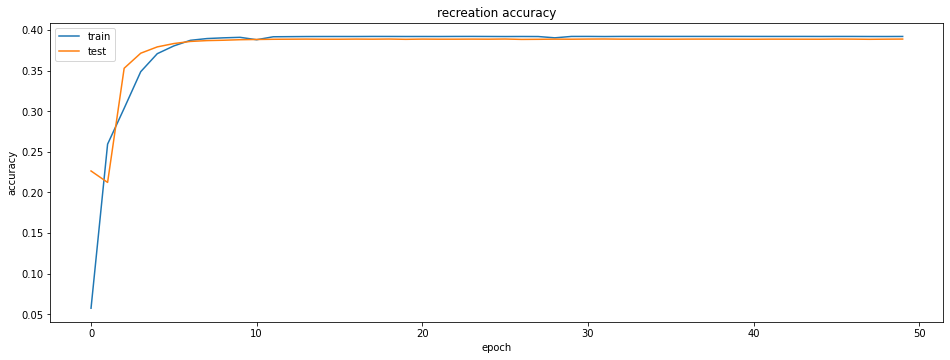

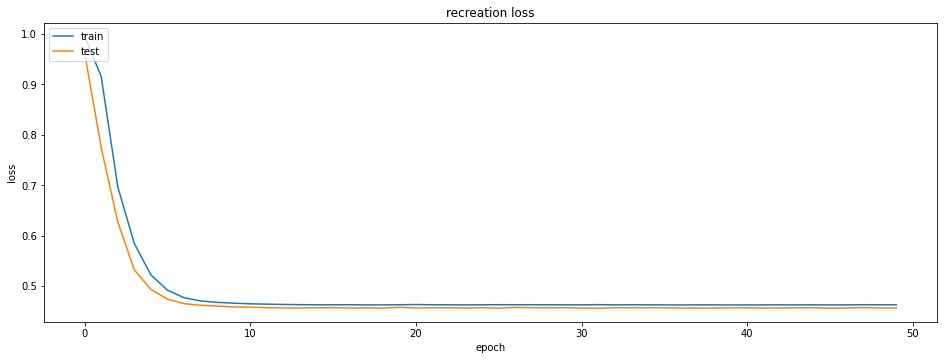

Inlear Upper bound: 0.6117328
Inlear Lower bound: 0.35839456
Outlier Upper bound: 0.76417387
Outlier Lower bound: 0.49479544
No. of correctly identified outlier: 4


In [ ]:
#Paraemter optimization through iterration
# Iteration of b1 by keeping model and b2 fixed
#################################### Main Normalized data#####################
b1 = 30 # 1st stage window size of enrichment
print("2nd Window size:",b2)
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 8
e = 50 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload()
# # Controled dataset for calculation check:
# # slice the data based on failure point
# sliceAt = 6 # No. of top failure points needs to include
# mfList_c = mfList[:sliceAt]
# rawTS_c = rawTS[0:mfList_c[-1]+1]
# Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
# Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
# Generate 2DCNN_AE
cnn_ae_model_1 , modelAsDAG_1 = cnn_ae_2d(b3,n)
modelAsDAG
# Compile and Train the Model
history_2dcnnae = modelTrain(x_trainN,e)
# Plot accuracy graph
plt_model_accuracy(history_2dcnnae)
# Outlier prediction
outlierPredict(x_trainN,x_testN)

## Optimization of 2DCNN-AE through Hypre Parameter optimization: Variable::model = m3_nn_model1 , Constant::(1st window size=30,2nd window:4)

In [ ]:
#Paraemter optimization through iterration
# Iteration of b1 by keeping model and b2 fixed
#################################### Main Normalized data#####################
b1 = 30 # 1st stage window size of enrichment
print("2nd Window size:",b2)
b2 = 4  # 2nd Stage window size of enrichment
b3 =16
n = 8
e = 50 # no. of epochs
# Load Raw TS data
rawTS, mfList = rawDataload()
# # Controled dataset for calculation check:
# # slice the data based on failure point
# sliceAt = 6 # No. of top failure points needs to include
# mfList_c = mfList[:sliceAt]
# rawTS_c = rawTS[0:mfList_c[-1]+1]
# Convert Raw TS in Inlier and outlier as per window size
x_train,y_train,x_test,y_test = TrainTestData(b1,rawTS,mfList)
# Check for max possible window size
maxWin = maxPossibleWin(mfList)
# Enrich the TS data
X_Inliear = main_fm(b1,b2,b3,n,x_train)
X_outlier = main_fm(b1,b2,b3,n,x_test)
# Normalize Inliear ( Do not use now as outlier normalization shoud be based on Inlier min-Max value)
x_trainN, x_testN = GlobalnormalizeData(X_Inliear,X_outlier,b3,n)
# Generate 2DCNN_AE
cnn_ae_model_1 , modelAsDAG_1 = m3_nn_model1(b3,n)
modelAsDAG
# Compile and Train the Model
history_nnae = m3_nn_model1_Train(x_trainN,e)
# Plot accuracy graph
plt_model_accuracy(history_nnae)
# Outlier prediction
outlierPredict(x_trainN,x_testN)

2nd Window size: 4
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
Total params: 8,352
Trainable params: 8,352
Non-trainable params: 0
_________________________________________________________________


AttributeError: ignored

# 6. Normal classs recognition Model Creation and Prediction 
## 6.1 Create OneClassSVM model

In [ ]:
from sklearn.svm import OneClassSVM
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.1)
#model = OneClassSVM(gamma='auto', nu=0.9,kernel='sigmoid')
#model =OneClassSVM(kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.001, nu=0.01, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
# fit on majority class
#trainX = trainX[trainy==0]
model.fit(X_train_scaled)
# detect outliers in the test set
yhat_test = model.predict(X_test_scaled)
#yhat_test = model.predict(X_train_scaled)

## 6.2 Confusion matirx of  test data for analysis

In [ ]:
#Check the classification model strength
from sklearn.metrics import classification_report
target_names = ['-1','1'] # Need to automate this step later
y_test_labled = np.array(test_labels)
#y_test_labled = np.array(train_labels)
y_predict_ana = yhat_test.astype('int64')
#print(classification_report(np.array(test_labels.astype('float32'))), test_predictions, target_names=target_names))
print(classification_report(y_test_labled, y_predict_ana, target_names=target_names))

## 6.3 Confusion matirx of  outlier data for analysis

In [ ]:
#Check the classification model strength
from sklearn.metrics import classification_report
yhat_ana = model.predict(X_anomaly)
target_names = ['-1','1'] # Need to automate this step later
y_ana_labled = np.array(ana_labels)
y_predict_ana = yhat_ana.astype('int64')
#print(classification_report(np.array(test_labels.astype('float32'))), test_predictions, target_names=target_names))
print(classification_report(y_ana_labled, y_predict_ana, target_names=target_names))